In [76]:
import numpy as np
import pandas as pd

In [47]:
tanzania = pd.read_csv('Train.csv')

In [49]:
tanzania2 = tanzania.loc[:,['package_transport_int', 'package_accomodation','package_food','package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance','cost_category']]

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,cost_category
0,Yes,Yes,Yes,Yes,No,No,No,High Cost
1,Yes,Yes,Yes,Yes,No,No,No,High Cost
2,Yes,Yes,Yes,Yes,Yes,Yes,No,Higher Cost
3,No,No,No,No,No,No,No,Lower Cost
4,Yes,Yes,Yes,Yes,No,Yes,Yes,Higher Cost


In [53]:
tanzania2.loc[tanzania2['cost_category']=='Lower Cost', 'cost_category'] = 0
tanzania2.loc[tanzania2['cost_category']=='Low Cost', 'cost_category'] = 1
tanzania2.loc[tanzania2['cost_category']=='Normal Cost', 'cost_category'] = 2
tanzania2.loc[tanzania2['cost_category']=='High Cost', 'cost_category'] = 3
tanzania2.loc[tanzania2['cost_category']=='Higher Cost', 'cost_category'] = 4

In [62]:
tanzania3 = tanzania2.replace({'No': 0, 'Yes': 1})

In [42]:
from plotnine import *

In [72]:
tanzania4 = tanzania3.drop(columns='cost_category')
tanzania4['sum'] = tanzania4.sum(axis=1)
def boo(x):
    a = list()
    for i in x:
        if (i > 0):
            a.append(1)
        else:
            a.append(0)
    return a
tanzania4['bool'] = boo(tanzania4['sum'])
tanzania4['cost_category'] = tanzania3['cost_category']

In [91]:
tanzania4.head(n=3)

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,sum,bool,cost_category
0,1,1,1,1,0,0,0,4,1,3
1,1,1,1,1,0,0,0,4,1,3
2,1,1,1,1,1,1,0,6,1,4


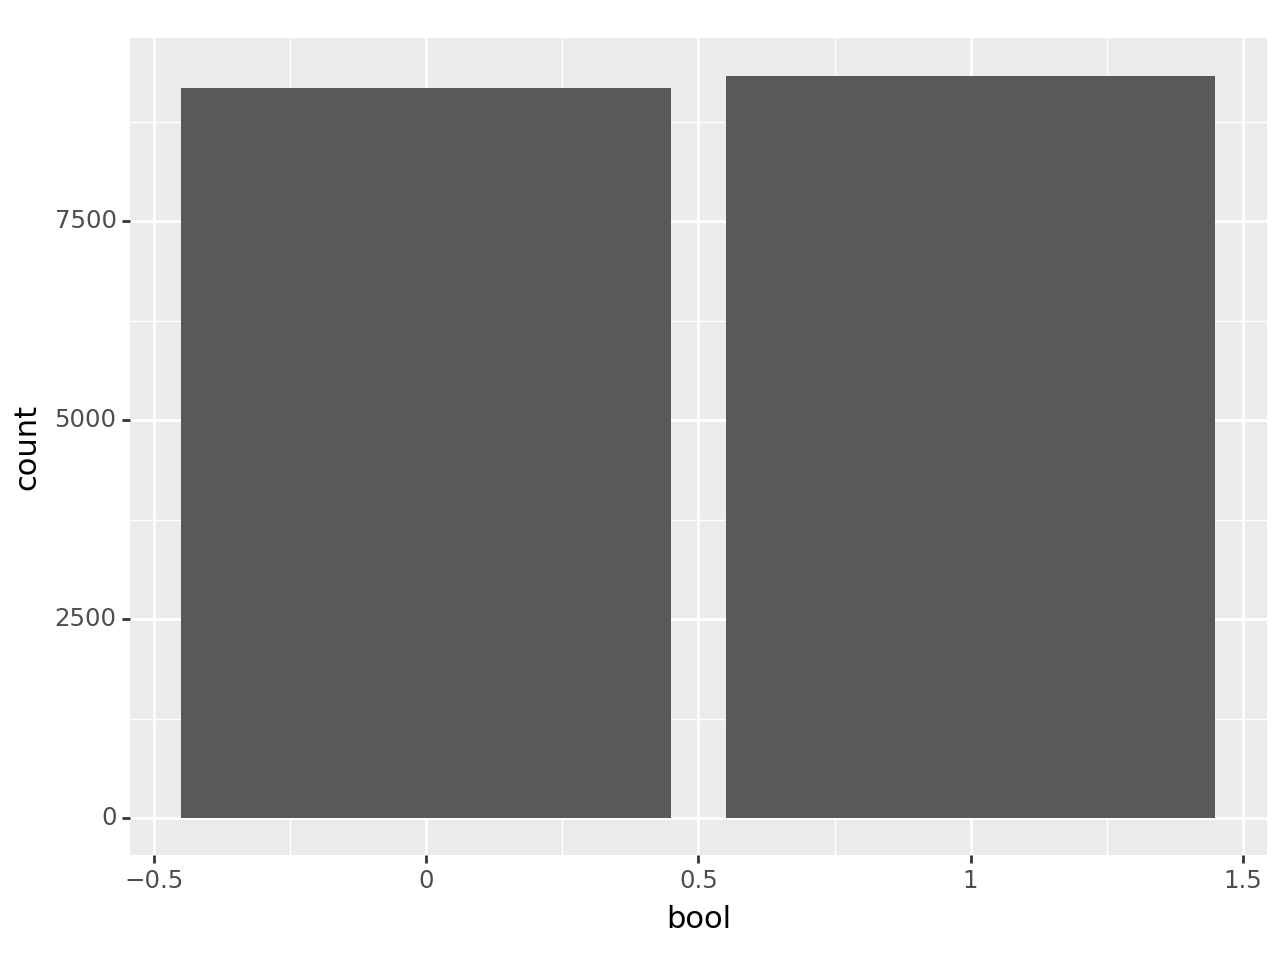

<Figure Size: (640 x 480)>

In [69]:
(ggplot(tanzania4)         # defining what data to use
 + aes(x='bool')    # defining what variable to use
 + geom_bar() # defining the type of plot to use
)

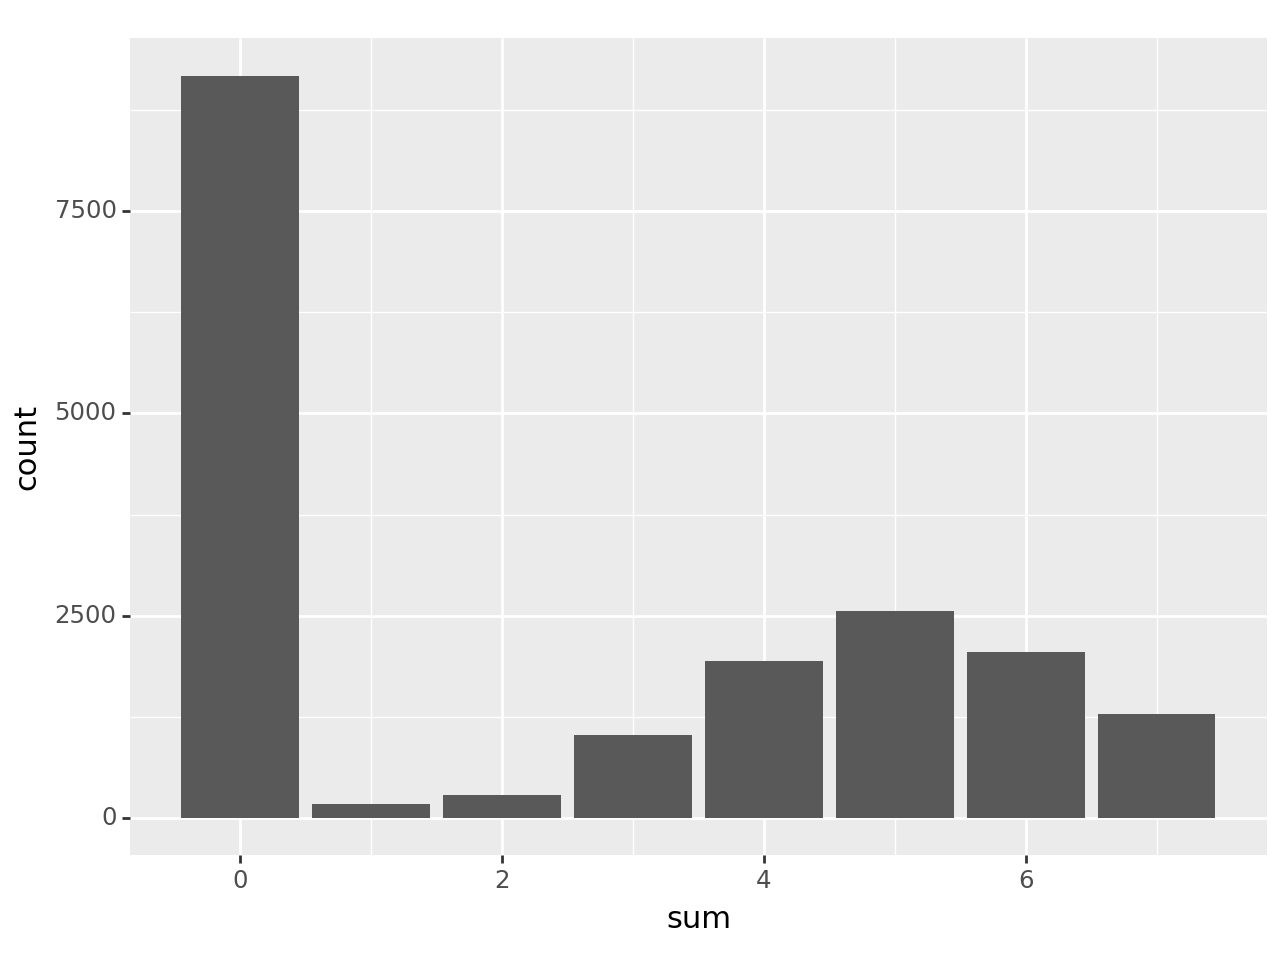

<Figure Size: (640 x 480)>

In [70]:
(ggplot(tanzania4) + aes(x = 'sum') + geom_bar())

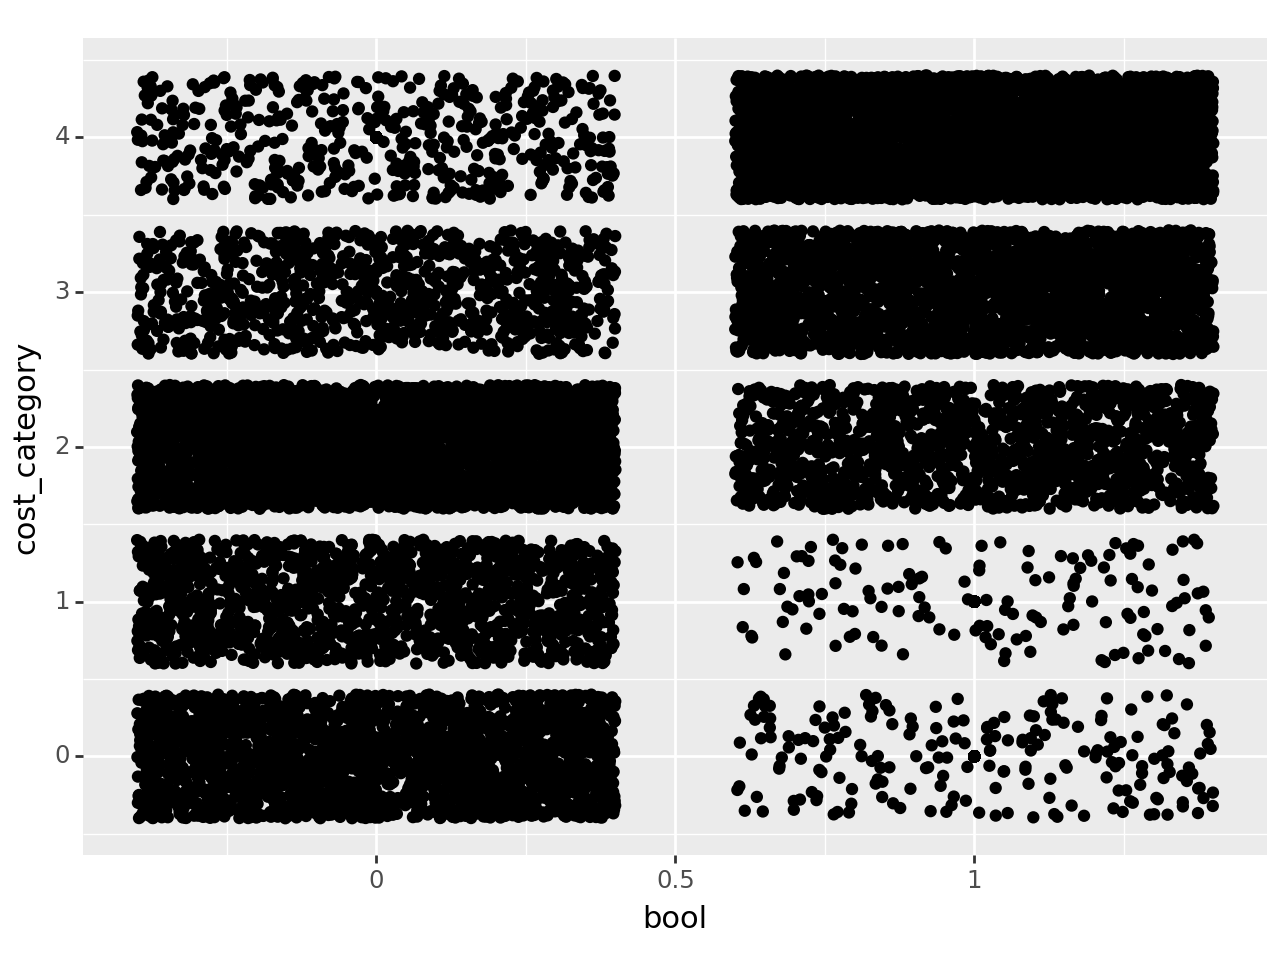

<Figure Size: (640 x 480)>

In [86]:
(ggplot(tanzania4) + aes(x='bool', y='cost_category') + geom_point() + geom_jitter())

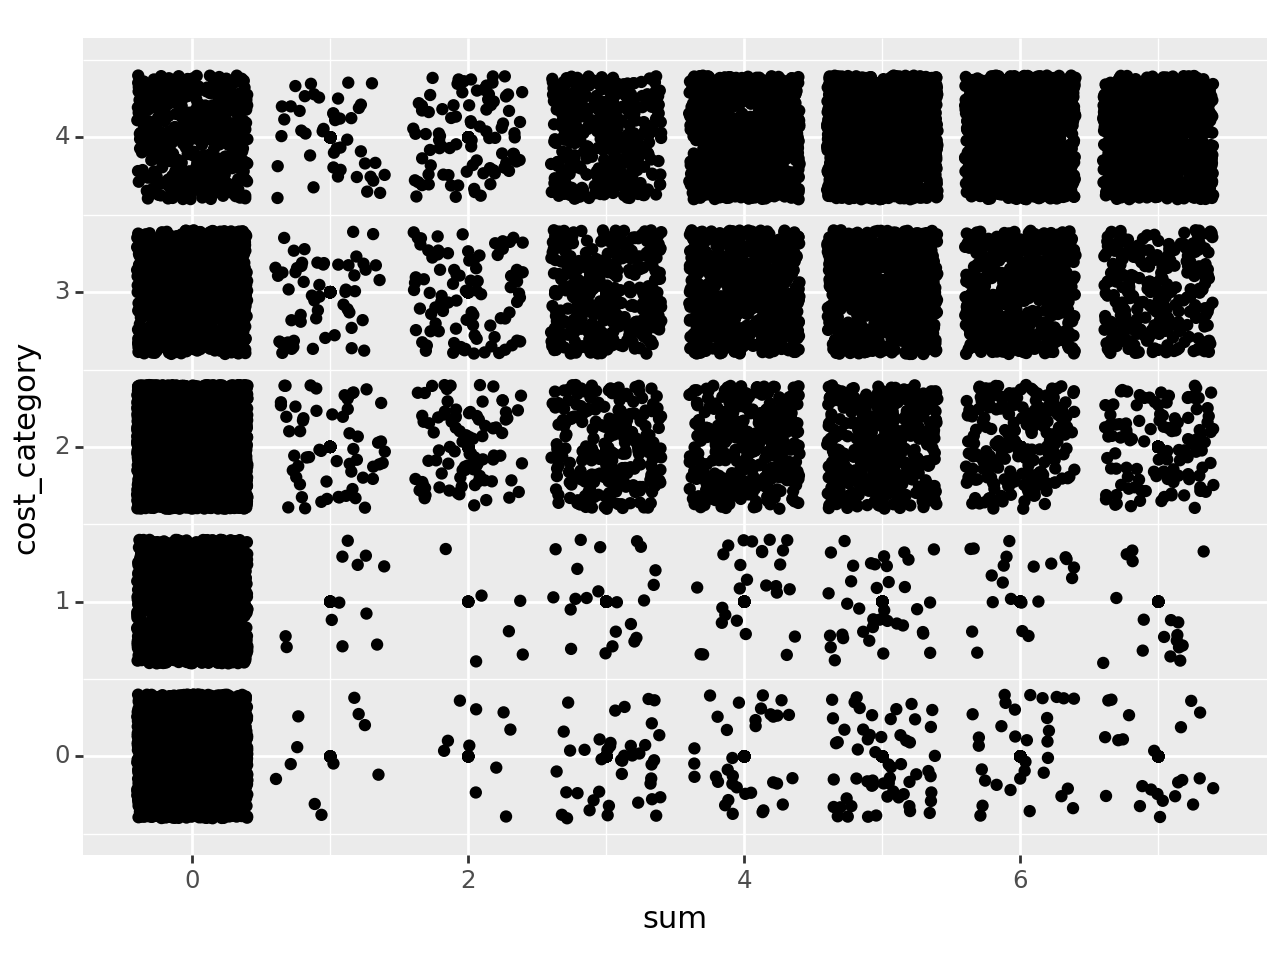

<Figure Size: (640 x 480)>

In [89]:
(ggplot(tanzania4) + aes(x='sum', y='cost_category')+ geom_point() + geom_jitter())